Loading the dataset

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.1 MB/s eta 0:00:00


***AG_NEWS dataset has been taken here. ***

As a benchmark dataset for text classification tasks, the AG News dataset is a collection of news items. It is made up of 120,000 news stories that have been collected from the internet and are divided into four groups: sports, business, science, and technology.

The dataset is divided into training and testing sets, and each article is represented by a title and a brief description. The testing set has 30,000 articles, whereas the training set has 90,000 articles.
Due to its size and variety of topics, the AG News dataset is frequently used for comparing text categorization techniques and models.

In [42]:
# Import necessary libraries
import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load a dataset
dataset = datasets.load_dataset("ag_news")

# Inspect the dataset
print(dataset)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


**Data Cleaning and Preprocessing**

In [6]:
df = pd.DataFrame(dataset["train"])
df

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


Remove duplicates - Eliminating duplication in EDA can result in more solid and trustworthy conclusions by ensuring that the analysis is founded on accurate and representative data.

In [14]:
df.drop_duplicates(subset=["text"], inplace=True) 

In [15]:
df["text"]

0         wall st. bears claw back into the black (reute...
1         carlyle looks toward commercial aerospace (reu...
2         oil and economy cloud stocks' outlook (reuters...
3         iraq halts oil exports from main southern pipe...
4         oil prices soar to all-time record, posing new...
                                ...                        
119995    pakistan's musharraf says won't quit as army c...
119996    renteria signing a top-shelf deal red sox gene...
119997    saban not going to dolphins yet the miami dolp...
119998    today's nfl games pittsburgh at ny giants time...
119999    nets get carter from raptors indianapolis -- a...
Name: text, Length: 119928, dtype: object

Converting to lowercase - It is crucial to convert text data to lowercase since it can assist prevent problems with capitalization, like treating the same word in several case variations as separate entities. It is simpler to find and analyse patterns and trends in the data, as well as to carry out text mining or natural language processing tasks, when all text data is converted to lowercase.


In [16]:
df["text"] = df["text"].str.lower()


In [22]:
df["text"]

0         [wall, bear, claw, back, black, reuters, reute...
1         [carlyle, look, toward, commercial, aerospace,...
2         [oil, economy, cloud, stock, outlook, reuters,...
3         [iraq, halt, oil, export, main, southern, pipe...
4         [oil, price, soar, record, posing, new, menace...
                                ...                        
119995    [pakistan, musharraf, say, wo, quit, army, chi...
119996    [renteria, signing, deal, red, sox, general, m...
119997    [saban, going, dolphin, yet, miami, dolphin, p...
119998    [today, nfl, game, pittsburgh, ny, giant, time...
119999    [net, get, carter, raptor, indianapolis, vince...
Name: text, Length: 119928, dtype: object

Remove stop words - Stop words are frequent words that are frequently used in speech, but they typically do not add much to the sense of a sentence or text. Stop words include "the," "and," "a," "an," "in," "of," "to," etc. in English. Remove stop words from text data in natural language processing (NLP) for the following reasons:Reduce noise, improve processing time and improve accuracy.

In [18]:
stop_words = set(stopwords.words("english"))

Converting it to string if some part is not 

In [25]:
df["text"] = df["text"].astype(str)

With the fillna() function, handle any NaN values in the "text" column 

In [26]:
df["text"] = df["text"].fillna("")

Lemmatization- Text data in a pandas DataFrame is lemmatized using the WordNetLemmatizer from the NLTK toolkit.

A word is reduced to its lemma, or basic form, through the process of lemmatization. For instance, the word "running" has the lemma "run." Lemmatizing words in text data enables the grouping of words with similar meanings, reduces the dimensionality of the data, and makes the data easier to handle and analyse.

In [27]:
lemmatizer = WordNetLemmatizer()
df["text"] = df["text"].apply(lambda x: [lemmatizer.lemmatize(word) for word in word_tokenize(x) if word.isalpha() and word not in stop_words])
df["text_len"] = df["text"].apply(len)

In [28]:
df["text_len"]

0         0
1         0
2         0
3         0
4         2
         ..
119995    0
119996    0
119997    0
119998    0
119999    0
Name: text_len, Length: 119928, dtype: int64

The frequency of each category and the distribution of text length are two helpful details about how the data in the DataFrame is distributed in these two lines of code.

In [29]:
# Descriptive Statistics
category_count = df["label"].value_counts()
print("Count of each category", category_count)
print(df["text_len"].describe())

Count of each category 0    29996
1    29992
2    29984
3    29956
Name: label, dtype: int64
count    119928.000000
mean          0.149948
std           0.469899
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: text_len, dtype: float64


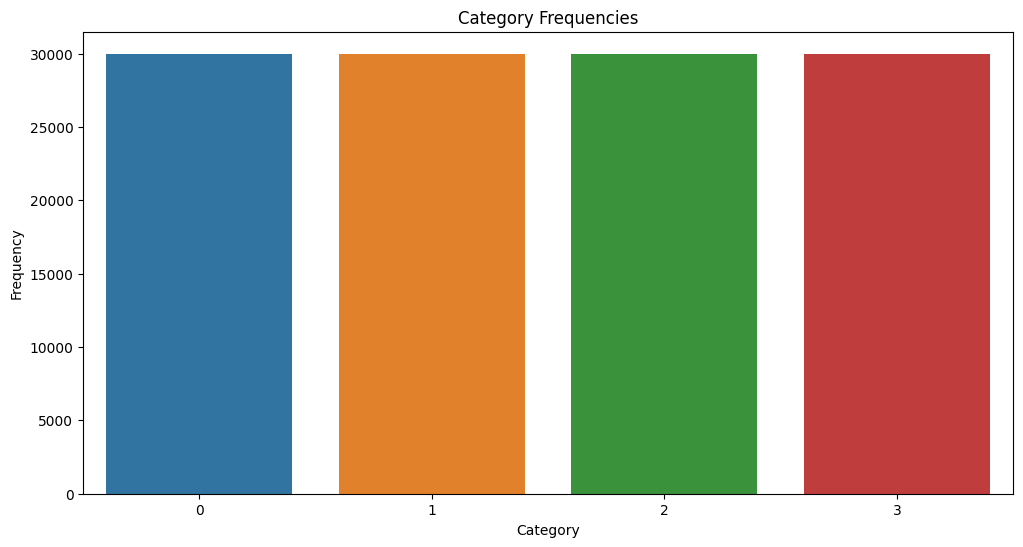

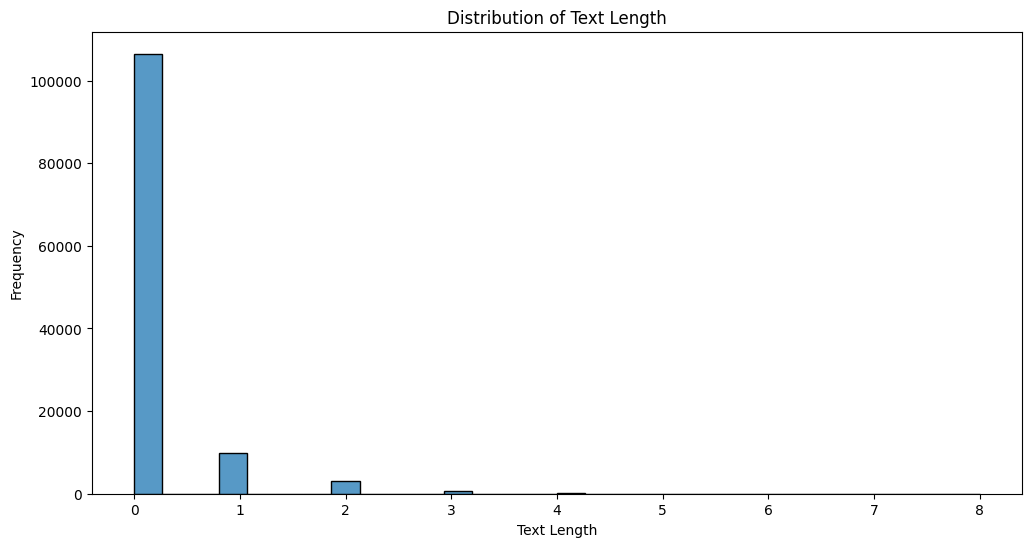

In [30]:
# Data Visualization
plt.figure(figsize=(12,6))
sns.countplot(x="label", data=df)
plt.title("Category Frequencies")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df["text_len"], bins=30)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


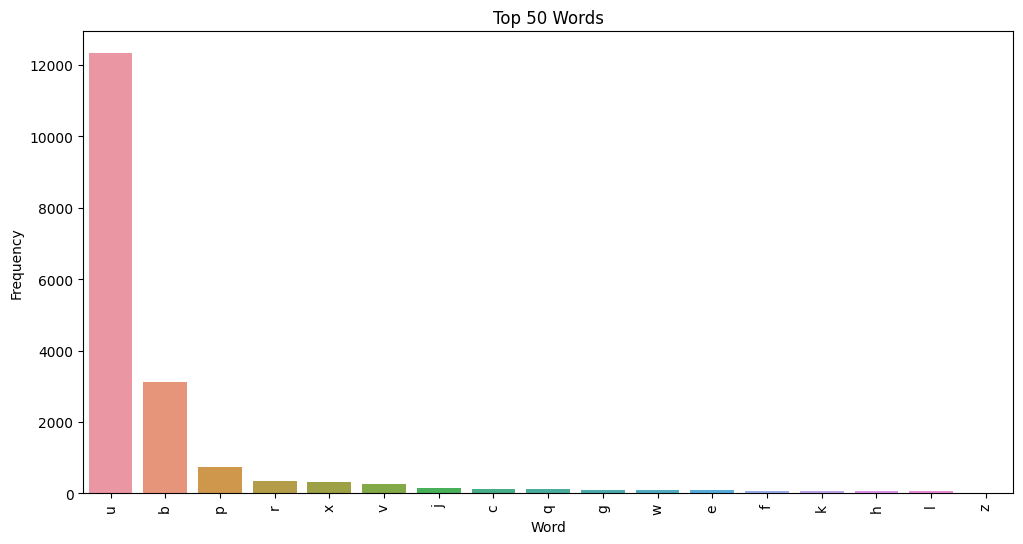

In [31]:
all_words = [word for text in df["text"] for word in text]
word_count = pd.Series(all_words).value_counts()
top_words = word_count.head(50)

plt.figure(figsize=(12,6))
sns.barplot(x=top_words.index, y=top_words.values)
plt.title("Top 50 Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


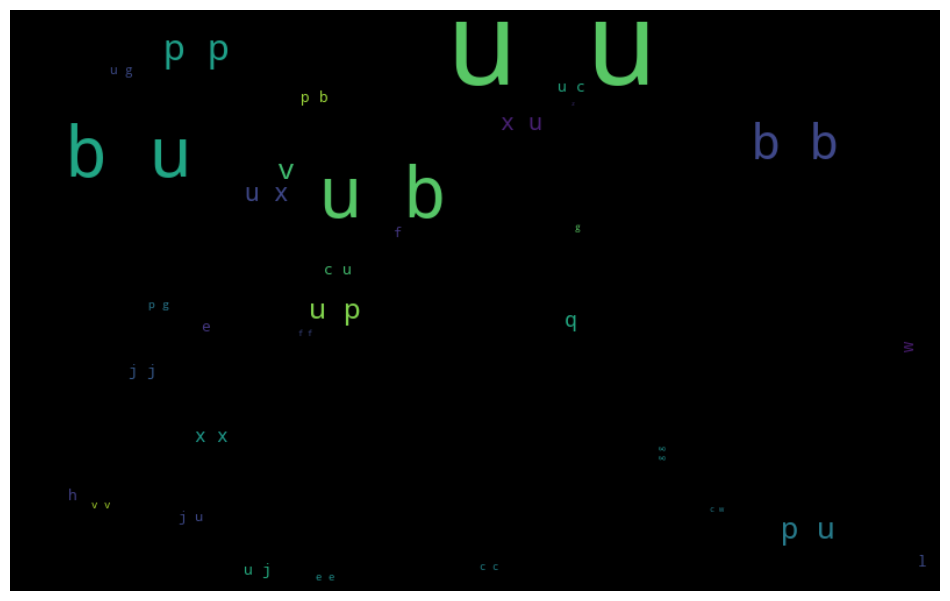

In [32]:
# Word Cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(" ".join(all_words))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

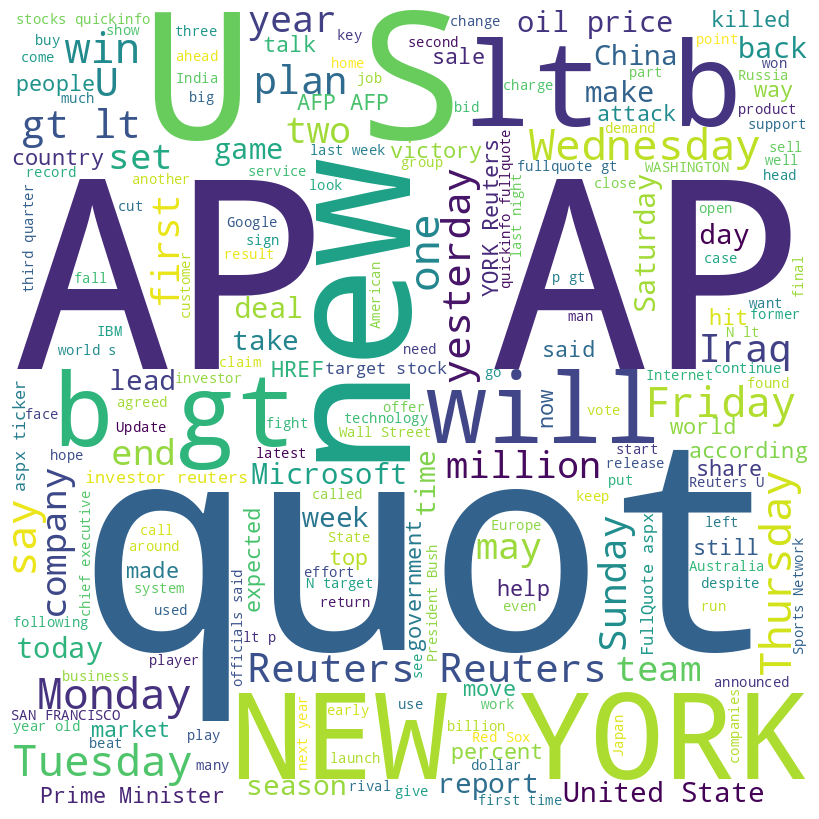

In [33]:
# Concatenate all the text in the dataset
all_text = " ".join(dataset["train"]["text"])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


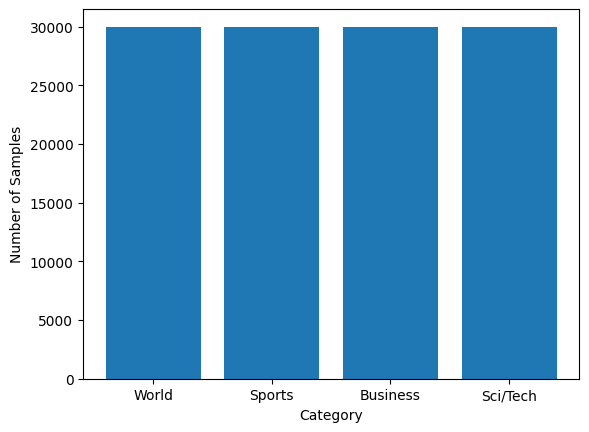

In [34]:
# Count the number of samples in each category
categories = dataset["train"]["label"]
unique_categories, category_counts = np.unique(categories, return_counts=True)

# Plot the distribution of the number of samples in each category
fig, ax = plt.subplots()
ax.bar(unique_categories, category_counts)
ax.set_xticks(unique_categories)
ax.set_xticklabels(dataset["train"].features["label"].names)
ax.set_xlabel("Category")
ax.set_ylabel("Number of Samples")
plt.show()



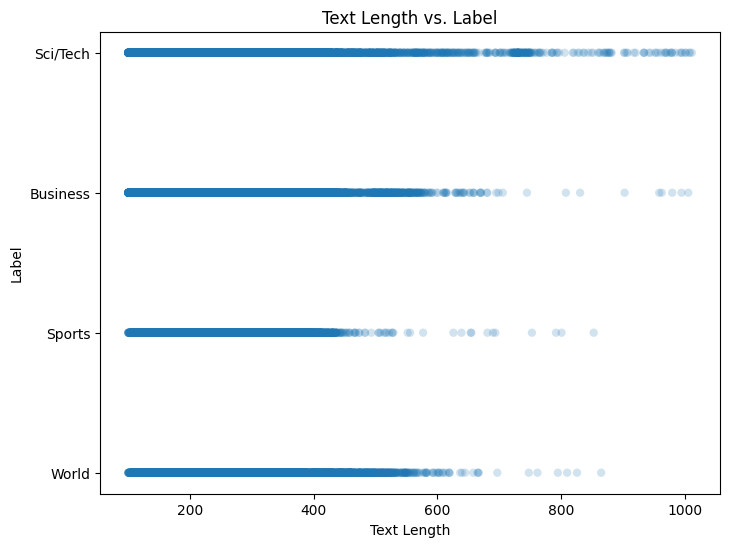

In [35]:
# Get the training data and labels
train_data = dataset["train"]["text"]
train_labels = dataset["train"]["label"]

# Calculate the length of each text sample
text_lengths = [len(text) for text in train_data]

# Create a scatter plot of text length vs. label
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(text_lengths, train_labels, alpha=0.2, edgecolors='none')
ax.set_title("Text Length vs. Label")
ax.set_xlabel("Text Length")
ax.set_ylabel("Label")
ax.set_yticks(range(len(dataset["train"].features["label"].names)))
ax.set_yticklabels(dataset["train"].features["label"].names)
plt.show()


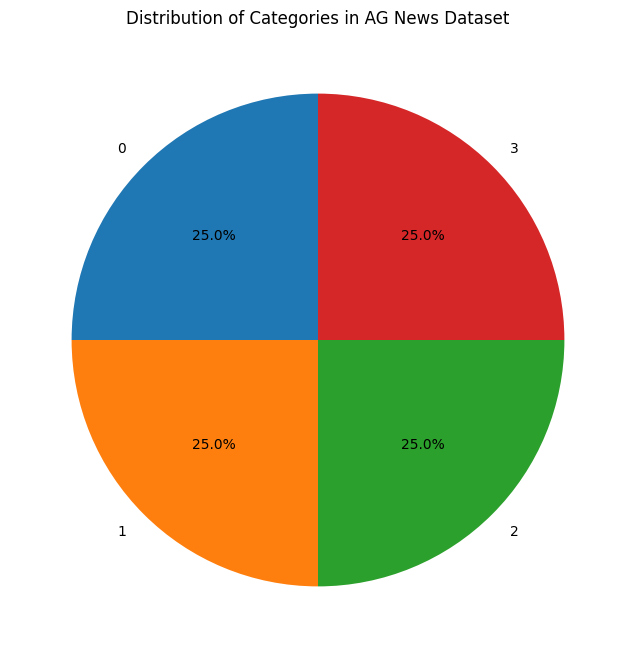

In [36]:

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(category_counts, labels=unique_categories, autopct='%1.1f%%', startangle=90)

# Set the title of the pie chart
ax.set_title('Distribution of Categories in AG News Dataset')

# Show the pie chart
plt.show()


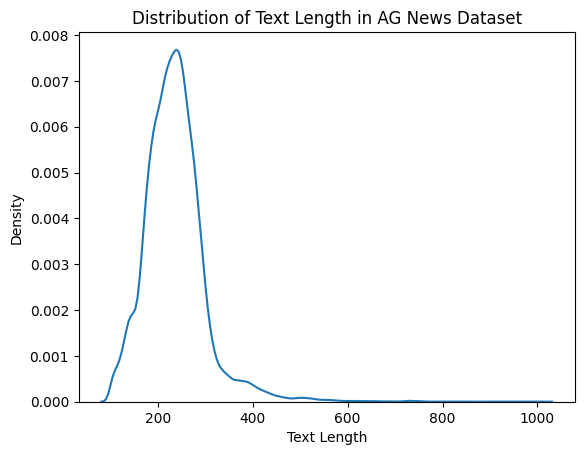

In [37]:
text_lengths = [len(sample['text']) for sample in dataset['train']]

# Create the KDE plot using seaborn
sns.kdeplot(x=text_lengths)

# Add a title and labels
plt.title("Distribution of Text Length in AG News Dataset")
plt.xlabel("Text Length")
plt.ylabel("Density")

# Display the plot
plt.show()
